In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
import catboost as cb

#Print the CatBoost version
print(cb.__version__)


1.2.2


In [3]:
# import data 
df=pd.read_csv('final_merged_data1.csv')
df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:

# Assuming 'df' is your DataFrame and 'old_column_name' is the current name of the column you want to rename
df.rename(columns={'Time_taken (min)': 'Time_taken'}, inplace=True)

In [5]:
df.head(500)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,29,5.0,21.170798,72.790489,21.220798,72.840489,Windy,Low,1,Buffet,scooter,1.0,No,Urban,16
496,33,4.7,12.972532,77.608179,12.992532,77.628179,Fog,Low,2,Drinks,scooter,1.0,No,Metropolitian,18
497,27,4.1,23.359033,85.325347,23.379033,85.345347,Stormy,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,16
498,0,4.7,17.426228,78.407495,17.556228,78.537495,Windy,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,24


In [6]:
df.to_csv('final_merged_data1.csv', index=False)

In [7]:
# Assuming df is your DataFrame and 'Time_taken (min)' is the column containing NaN values
df.dropna(subset=['Time_taken'], inplace=True)
df.dropna(subset=['Delivery_person_Age'], inplace=True)
df.dropna(subset=['Delivery_person_Ratings'], inplace=True)
df.dropna(subset=['Restaurant_latitude'], inplace=True )
df.dropna(subset=['Restaurant_longitude'], inplace=True  )
df.dropna(subset=['Delivery_location_latitude'], inplace=True  )
df.dropna(subset=['Weather_conditions'], inplace=True  )
df.dropna(subset=['Road_traffic_density'], inplace=True  )

df.dropna(subset=['Vehicle_condition'], inplace=True  )

df.dropna(subset=['Type_of_order'], inplace=True  )
df.dropna(subset=['Type_of_vehicle'], inplace=True  )
df.dropna(subset=['multiple_deliveries'], inplace=True  )
df.dropna(subset=['Festival'], inplace=True  )
df.dropna(subset=['City'], inplace=True  )


In [8]:
df['Time_taken'].unique()

array(['46', '23', '21', '20', '41', '33', '40', '15', '36', '26', '39',
       '34', '18', '38', '47', '12', '22', '25', '35', '30', '10', '19',
       '11', '28', '52', '16', '27', '49', '24', '17', '14', '37', '44',
       '42', '31', '13', '29', '50', '43', '48', '32', '54', '53', '45',
       '51', '36A'], dtype=object)

In [9]:
import numpy as np

# Define the original array
original_array = np.array([46, 23, 21, 20, 41, 33, 40, 15, 36, 26, 39, 34, 18, 38, 47, 12, 22,
                           25, 35, 30, 10, 19, 11, 28, 52, 16, 27, 49, 24, 17, 14, 37, 44, 42,
                           31, 13, 29, 50, 43, 48, 32, 54, 53, 45, 51, '19', '31', '42', '27',
                           '12', '24', '26', '15', '22', '39', '40', '34', '21', '29', '33',
                           '13', '30', '25', '16', '23', '32', '47', '17', '36', '43', '10',
                           '35', '44', '38', '20', '18', '37', '14', '28', '46', '11', '45',
                           '50', '49', '51', '41', '53', '54', '52', '48', '36A'], dtype=object)

# Remove any elements that contain the character 'A'
cleaned_array = np.array([x for x in original_array if 'A' not in str(x)])

print("Cleaned array:")
print(cleaned_array)


Cleaned array:
['46' '23' '21' '20' '41' '33' '40' '15' '36' '26' '39' '34' '18' '38'
 '47' '12' '22' '25' '35' '30' '10' '19' '11' '28' '52' '16' '27' '49'
 '24' '17' '14' '37' '44' '42' '31' '13' '29' '50' '43' '48' '32' '54'
 '53' '45' '51' '19' '31' '42' '27' '12' '24' '26' '15' '22' '39' '40'
 '34' '21' '29' '33' '13' '30' '25' '16' '23' '32' '47' '17' '36' '43'
 '10' '35' '44' '38' '20' '18' '37' '14' '28' '46' '11' '45' '50' '49'
 '51' '41' '53' '54' '52' '48']


In [10]:
df['Time_taken'].unique()

array(['46', '23', '21', '20', '41', '33', '40', '15', '36', '26', '39',
       '34', '18', '38', '47', '12', '22', '25', '35', '30', '10', '19',
       '11', '28', '52', '16', '27', '49', '24', '17', '14', '37', '44',
       '42', '31', '13', '29', '50', '43', '48', '32', '54', '53', '45',
       '51', '36A'], dtype=object)

In [11]:
import pandas as pd

# Assuming df is your DataFrame
df['Time_taken'] = df['Time_taken'][df['Time_taken'] != '36A']

# Convert the column to numeric type
df['Time_taken'] = pd.to_numeric(df['Time_taken'])

# Drop NaN values
df.dropna(subset=['Time_taken'], inplace=True)

# Display unique values to verify the removal of '36A'
print(df['Time_taken'].unique())



[46. 23. 21. 20. 41. 33. 40. 15. 36. 26. 39. 34. 18. 38. 47. 12. 22. 25.
 35. 30. 10. 19. 11. 28. 52. 16. 27. 49. 24. 17. 14. 37. 44. 42. 31. 13.
 29. 50. 43. 48. 32. 54. 53. 45. 51.]


In [12]:
# Assuming 'column_name' is the name of the column you want to convert
df['Time_taken'] = df['Time_taken'].astype(int)

In [13]:
df['Time_taken'].dtype

dtype('int32')

In [14]:
df.to_csv('final_merged_data2.csv', index=False)


In [15]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [16]:
df['Time_taken'].unique()

array([46, 23, 21, 20, 41, 33, 40, 15, 36, 26, 39, 34, 18, 38, 47, 12, 22,
       25, 35, 30, 10, 19, 11, 28, 52, 16, 27, 49, 24, 17, 14, 37, 44, 42,
       31, 13, 29, 50, 43, 48, 32, 54, 53, 45, 51])

In [17]:
df.drop(labels=['Delivery_person_Ratings'],axis=1, inplace=True)
df.drop(labels=['Restaurant_latitude'],axis=1, inplace=True)
df.drop(labels=['Restaurant_longitude'],axis=1, inplace=True)
df.drop(labels=['Delivery_location_latitude'],axis=1, inplace=True)
df.drop(labels=['Delivery_location_longitude'],axis=1, inplace=True)

In [18]:
df.to_csv('final_merged_data3.csv', index=False)

In [19]:
#creating dependent and independent variable 
x=df.drop(labels=['Time_taken'],axis=1)


In [20]:
y=df.Time_taken


In [21]:
#segregate numerical and categorical columns 
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Numerical columns:',numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries',
       'Time_taken'],
      dtype='object')
Categorical Columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [22]:
df.dropna()

,Delivery_person_Age,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...
45578,35,Windy,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,33
45579,30,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,21,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,30,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16


In [23]:
df.head()

,Delivery_person_Age,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,36,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [24]:
df['Time_taken'].unique()

array([46, 23, 21, 20, 41, 33, 40, 15, 36, 26, 39, 34, 18, 38, 47, 12, 22,
       25, 35, 30, 10, 19, 11, 28, 52, 16, 27, 49, 24, 17, 14, 37, 44, 42,
       31, 13, 29, 50, 43, 48, 32, 54, 53, 45, 51])

In [25]:
df['Delivery_person_Age'].unique()


array([36, 21, 23, 34, 24, 29, 35, 33, 25, 31, 37, 27, 32, 26, 38, 20, 22,
        0, 28, 39, 30, 15, 50], dtype=int64)

In [37]:
df['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [38]:
df['Festival'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer




numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)



In [27]:
x=preprocessor.fit_transform(x)

In [28]:
x.shape

(45583, 26)

In [29]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((36466, 26), (9117, 26))

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.9549
- Mean Absolute Error: 5.5091
- R2 Score: 0.4528
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9379
- Mean Absolute Error: 5.5161
- R2 Score: 0.4446


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.1446
- Mean Absolute Error: 6.5766
- R2 Score: 0.2496
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0482
- Mean Absolute Error: 6.5251
- R2 Score: 0.2526


Ridge
Model performance for Training set
- Root Mean Squared Error: 6.9545
- Mean Absolute Error: 5.5084
- R2 Score: 0.4529
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9370
- Mean Absolute Error: 5.5148
- R2 Score: 0.4448


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.1895
- Mean Absolute Error: 4.0048
- R2 Score: 0.6954
-----------------------

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.637087
6,XGBRegressor,0.632016
5,Random Forest Regressor,0.541397
3,K-Neighbors Regressor,0.531955
2,Ridge,0.444780
0,Linear Regression,0.444624
8,AdaBoost Regressor,0.420246
4,Decision Tree,0.386842
1,Lasso,0.252645


In [33]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Instantiate CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=False)

# Fit the model
catboost_model.fit(x_train, y_train)

# Make predictions
y_pred = catboost_model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)


R^2 Score: 0.6370874210571561
Mean Absolute Error: 4.447250048730698
Mean Squared Error: 31.454102919692506
Root Mean Squared Error: 5.608395752770351


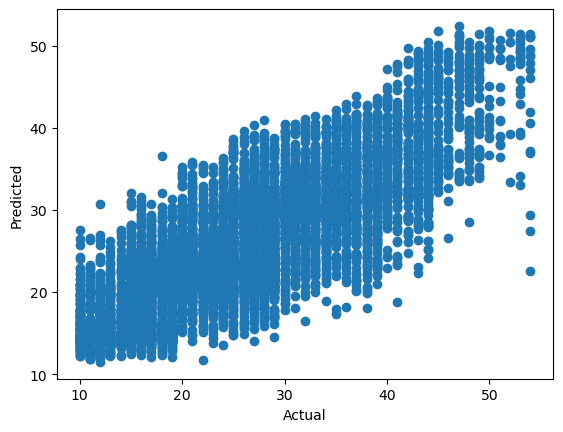

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

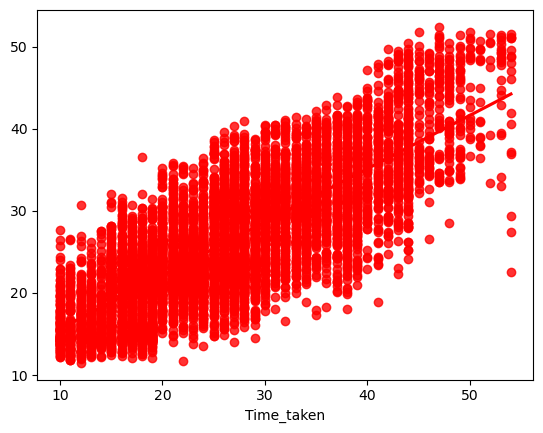

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
27809,20,23.952387,-3.952387
31399,49,36.830770,12.169230
11902,22,17.450397,4.549603
40435,13,20.350775,-7.350775
23458,16,20.334319,-4.334319
...,...,...,...
8426,14,17.405483,-3.405483
768,15,23.584178,-8.584178
28387,39,34.431795,4.568205
29028,34,31.469899,2.530101
